<a href="https://colab.research.google.com/github/abdullahmazhar51/linear_regression/blob/master/Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("reg.txt", sep = " ", header = None, names = ['x', 'y'])

In [3]:
data.head()

,x,y
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568


In [4]:
data.tail()

,x,y
85,0.95,1.9841
86,0.96,2.0066
87,0.97,2.0493
88,0.98,2.0503
89,0.99,2.0214


In [5]:
x = data['x'].values


In [6]:
y = data['y'].values

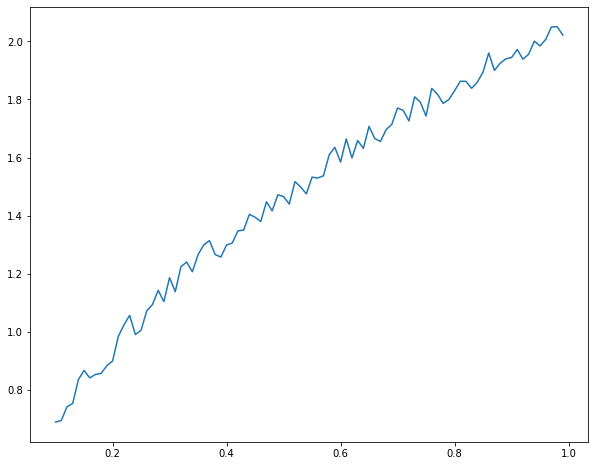

In [7]:
plt.figure(figsize = (10, 8))
plt.plot(x,y)
plt.show()

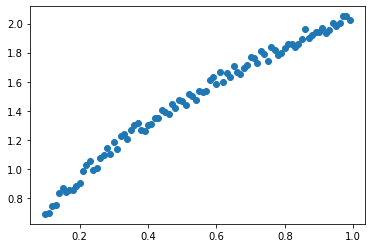

In [8]:
plt.scatter(x, y)
plt.show()

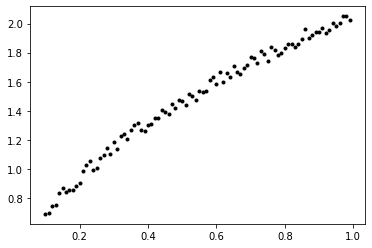

In [9]:
plt.plot(x, y, 'k.')
plt.show()

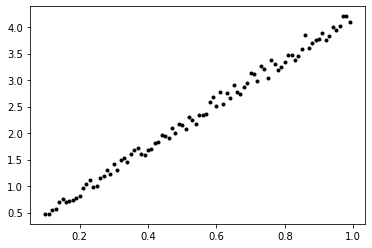

In [10]:
Y = y ** 2
plt.plot(x,Y, '.k')
plt.show()

In [11]:
m, c, _, _, _ = stat.linregress(x, Y)
print(m, c)

4.141484466369428 0.07358041497643963


In [12]:
ylr = m * x + c
ylr

array([0.48772886, 0.52914371, 0.57055855, 0.6119734 , 0.65338824,
       0.69480308, 0.73621793, 0.77763277, 0.81904762, 0.86046246,
       0.90187731, 0.94329215, 0.984707  , 1.02612184, 1.06753669,
       1.10895153, 1.15036638, 1.19178122, 1.23319607, 1.27461091,
       1.31602575, 1.3574406 , 1.39885544, 1.44027029, 1.48168513,
       1.52309998, 1.56451482, 1.60592967, 1.64734451, 1.68875936,
       1.7301742 , 1.77158905, 1.81300389, 1.85441874, 1.89583358,
       1.93724842, 1.97866327, 2.02007811, 2.06149296, 2.1029078 ,
       2.14432265, 2.18573749, 2.22715234, 2.26856718, 2.30998203,
       2.35139687, 2.39281172, 2.43422656, 2.47564141, 2.51705625,
       2.55847109, 2.59988594, 2.64130078, 2.68271563, 2.72413047,
       2.76554532, 2.80696016, 2.84837501, 2.88978985, 2.9312047 ,
       2.97261954, 3.01403439, 3.05544923, 3.09686408, 3.13827892,
       3.17969376, 3.22110861, 3.26252345, 3.3039383 , 3.34535314,
       3.38676799, 3.42818283, 3.46959768, 3.51101252, 3.55242

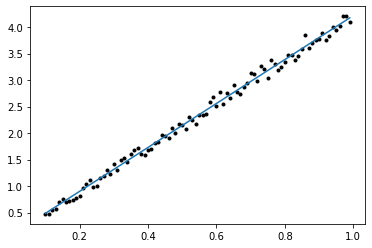

In [13]:
plt.plot(x, Y, '.k')
plt.plot(x, ylr)
plt.show()

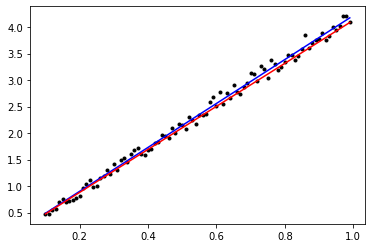

In [14]:
plt.plot(x, Y, '.k')
plt.plot(x, ylr, color = 'blue')
plt.plot([x[0], x[-1]], [Y[0], Y[-1]], color = 'red')
plt.show()

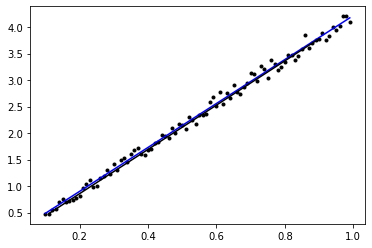

In [15]:
plt.plot(x, Y, '.k')
plt.plot(x, ylr, color = 'blue')
plt.plot([x[1], x[80]], [Y[1], Y[80]], color = 'black')
plt.show()

## Seeing the effect of outliers

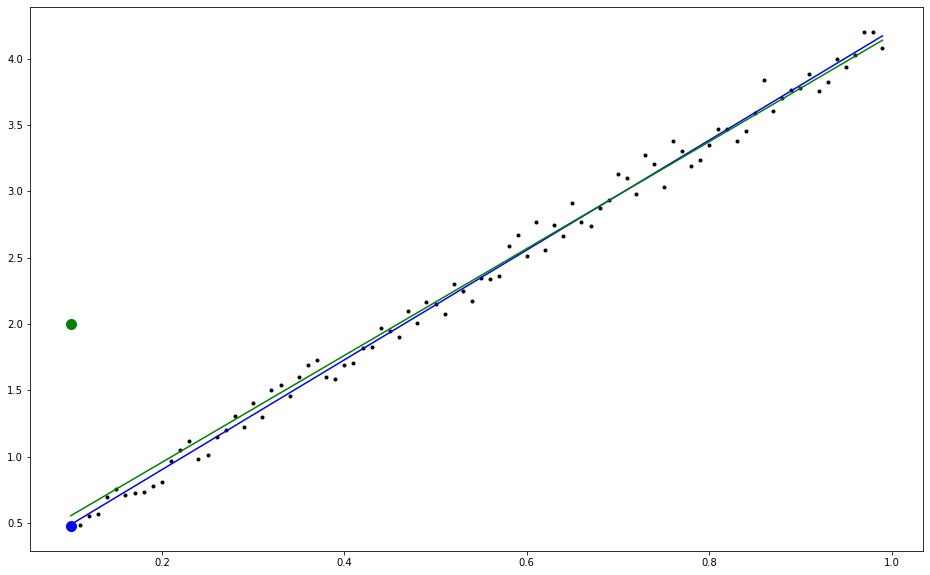

In [16]:
x1 = np.array(x) # make a copy of all x values
y1 = np.array(Y) # make a copy of all Y values

# Plot the data
plt.figure(figsize=(16,10))
plt.plot(x1, y1, 'k.')

# Plot the original best fit
plt.plot(x, ylr, color='blue')

# MAKE A SMALL CHANGE TO THE Y value of the 0th data point:
y1[0] = 2 # we have made a small change

# Find the new best fit line with the outlier
m1, c1, _, _, _ = stat.linregress(x1, y1)
y1lr = m1 * x1 + c1 

# Plot the new line, and the point before change (BLUE) and after change (GREEN)
plt.plot(x1, y1lr, color='green')
plt.plot(x[0], Y[0], 'bo', markersize=10)
plt.plot(x1[0], y1[0], 'go', markersize=10)
plt.show()

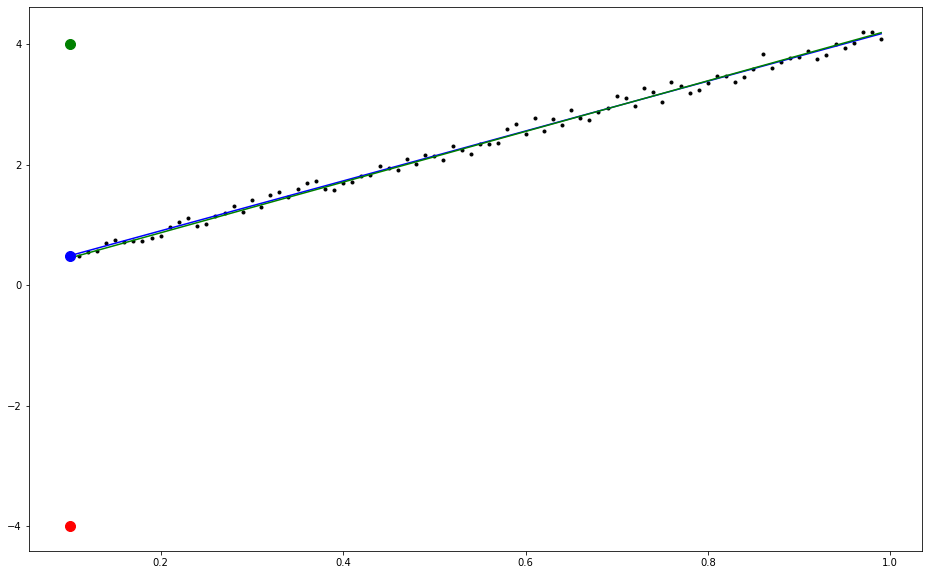

In [17]:
x2 = np.array(x) # make a copy of all x values
y2 = np.array(Y) # make a copy of all Y values

# Plot the data
plt.figure(figsize=(16,10))
plt.plot(x2, y2, 'k.')

# Plot the original best fit
plt.plot(x, ylr, color='blue')

# MAKE A SMALL CHANGE TO THE Y value of the 0th data point:
y2[0] = 4 # we have made a small change
y2[1] = -4
# Find the new best fit line with the outlier
m2, c2, _, _, _ = stat.linregress(x2, y2)
y2lr = m2 * x2 + c2 

# Plot the new line, and the point before change (BLUE) and after change (GREEN)
plt.plot(x2, y2lr, color='green')
plt.plot(x[0], Y[0], 'bo', markersize=10)
plt.plot(x2[0], y2[0], 'go', markersize=10)
plt.plot(x2[0], y2[1],'ro', markersize = 10)
plt.show()

In [46]:
data = pd.read_csv("reg.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [47]:
l = data['l'].values
t = data['t'].values
tsq = t * t

We quickly summarise the essenial parts of the Gradient Descent method:

$y = mx + c$

$E$ =$\frac{1}{n}$ $\sum_{i=1}^n (y_i - y)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$ $\sum_{i=1}^n  -x_i(y_i - (mx_i + c))$

$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$ $\sum_{i=1}^n  -(y_i - (mx_i + c))$

In [40]:
def train(x, y, m, c, eta):
  const = -2.0/len(y)
  ycalc = m*x + c
  delta_m = const * sum(x * (y - ycalc))
  delta_c = const * sum(y - ycalc)
  m = m - delta_m * eta
  c = c - delta_c * eta
  error = sum((y-ycalc)**2)/len(y)
  return m, c, error

def train_on_all(x, y, m, c, eta, iterations = 1000):
  for steps in range(iterations):
    m, c, err = train(x, y, m , c, eta)
    return m, c, error

TRAIN
Let us visualize the training:
$\eta$ = 0.01
Training for 1000 iterations, plotting after every 100 iterations:

In [41]:
# Init m, c
m, c = 0, 0

#Learning rate
lr = 0.001

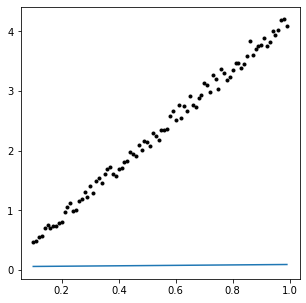

In [56]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
  


Error vs m, c
Let us visualize the error as a function of m and c

In [57]:
def error(x,y,m,c):
    ycalc = m * x + c
    error = sum((y - ycalc)**2) / len(y)
    return error

(400, 400) (400, 400) (400, 400)


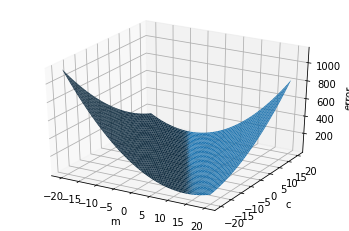

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ms1 = np.arange(-20, 20, 0.1)
cs1 = np.arange(-20, 20, 0.1)
X, Y = np.meshgrid(ms1, cs1)
err = []
for i in range(len(ms1)):
    for j in range(len(cs1)):
        err.append(error(l,tsq,ms1[i],cs1[j]))
err = np.array(err)
Z = np.reshape(err,(-1,len(ms1)))
print(X.shape, Y.shape, Z.shape)
ax.plot_surface(X, Y, Z) 
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('error')
plt.show()

